In [1]:
using Plots
using Interact
pgfplots()

INFO: Interact.jl: using new nbwidgetsextension protocol


Plots.PGFPlotsBackend()

In [2]:
epsilon = 0.3
kappa = 1.8
delta = 0.333
radius = 10.0
blanket = 1.2
sigma = 0.1
ctf = 1.6
coh = 1.05

return

In [3]:
function itr(cur_value::AbstractFloat, cur_count=11)
    dif_value = cur_value * 0.7
    min_value = cur_value - dif_value
    max_value = cur_value + dif_value
    linspace(min_value, max_value, cur_count)
end

itr (generic function with 2 methods)

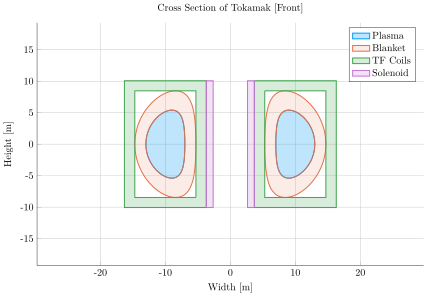

In [4]:
tmp_val_1 = 0.3 * ( 1 - delta ^ 2 )
tmp_val_2 = ( -1 + 2 * delta + tmp_val_1 ) / 8

cc = [
    -delta/2, 1 - tmp_val_2,
    +delta/2, 0 + tmp_val_2
]

npts = 101
aa = linspace(0, 2*pi, npts)

xx = zeros(aa)

for (cur_i, cur_c) in enumerate(cc)
    xx += cur_c * cos.( (cur_i-1) * aa )
end

yy = kappa * sin.(aa)

rr = radius * ( 1 + epsilon * xx )
zz = radius * ( 0 + epsilon * yy )

plot()

bb = 1.2

cc = 0.8

rr2 = radius * ( 1 + ( epsilon + bb / radius ) * xx * ( radius + bb ) / radius )
zz2 = radius * ( 0 + ( epsilon + bb / radius ) * yy * ( radius + bb ) / radius )

plot!(
    [-rr..., NaN, +rr...], 
    [+zz..., NaN, +zz...],
    label="Plasma", fill=true, fillopacity=0.25
)

plot!(
    [-rr2..., NaN, +rr2...,NaN,+rr..., NaN, -rr...], 
    [+zz2..., NaN, +zz2...,NaN,+reverse(zz)..., NaN, +reverse(zz)...],
    label="Blanket", fill=true, fillopacity=0.125
)

max_radius = maximum(itr(radius)) * 1.75
max_height = maximum(itr(radius)) * 1.75

xlims!(-max_radius, +max_radius)
ylims!(-max_radius*epsilon*kappa*1.2, +max_radius*epsilon*kappa*1.2)

xlabel!("Width [m]")
ylabel!("Height [m]")

title!("Cross Section of Tokamak [Front]")

xir = radius * ( 1 + ( epsilon + bb / radius ) * xx[1] * ( radius + bb ) / radius )
xil = radius * ( 1 + ( epsilon + bb / radius ) * xx[Int(((npts-1))/2)+1] * ( radius + bb ) / radius )

yit = radius * ( 0 + ( epsilon + bb / radius ) * yy[Int(((npts-1))/4)+1] * ( radius + bb ) / radius )
yib = radius * ( 0 + ( epsilon + bb / radius ) * yy[3*Int(((npts-1))/4)+1] * ( radius + bb ) / radius )

xol = xil - ctf
xor = xir + ctf

yot = yit + ctf
yob = yib - ctf

tf_x = [xil, xir, xir, xil, xil, NaN]
append!(tf_x, reverse([xol, xor, xor, xol, xol]))

tf_y = [yit, yit, yib, yib, yit, NaN]
append!(tf_y, reverse([yot, yot, yob, yob, yot]))

plot!([-tf_x...,NaN,tf_x...], [-tf_y...,NaN,tf_y...], fill=true, fillopacity=0.2, label="TF Coils")

oh_x = [xol, xol, xol-coh, xol-coh, xol]
oh_y = [yot, yob, yob, yot, yot]

plot!([-oh_x...,NaN,oh_x...], [-oh_y...,NaN,oh_y...], fill=true, fillopacity=0.2, label="Solenoid")

In [5]:
sol_in = xol-coh
sol_out = xol

tf_in = xol
tf_out = xor

theta = linspace(0, 2*pi)

function xr(r,t=theta)
   r * cos.(t) 
end

function yr(r,t=theta)
   r * sin.(t) 
end

yr (generic function with 2 methods)

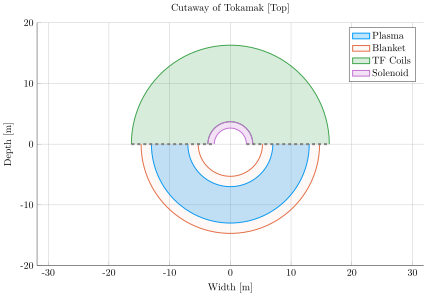

In [6]:
l1 = linspace(0,pi)

plot()
plot!([xr(rr[Int(((npts-1))/2)+1], l1)...,NaN,reverse(xr(rr[1], l1))...],-[yr(rr[Int(((npts-1))/2)+1], l1)...,NaN,reverse(yr(rr[1], l1))...], label="Plasma", fill=true, fillopacity=0.25)
plot!([xr(xil, l1)...,NaN,reverse(xr(xir, l1))...],-[yr(xil, l1)...,NaN,reverse(yr(xir, l1))...], label="Blanket", fill=true, fillopacity=0.05)
plot!([xr(tf_in,l1)...,NaN,reverse(xr(tf_out,l1))...],[yr(tf_in,l1)...,NaN,reverse(yr(tf_out,l1))...], fill=true, fillopacity=0.2, label="TF Coils")
plot!([xr(sol_in, l1)...,NaN,reverse(xr(sol_out, l1))...],[yr(sol_in, l1)...,NaN,reverse(yr(sol_out, l1))...], fill=true, fillopacity=0.2, label="Solenoid")
xlabel!("Width [m]")
ylabel!("Depth [m]")

plot!([-tf_out,-sol_in,NaN,sol_in,tf_out],[0,0,NaN,0,0], color="grey", style=:dash, label="", linewidth=2)
title!("Cutaway of Tokamak [Top]")

ylims!(-20, 20)
xlims!(-30,30)
plot!(aspect_ratio=:equal)

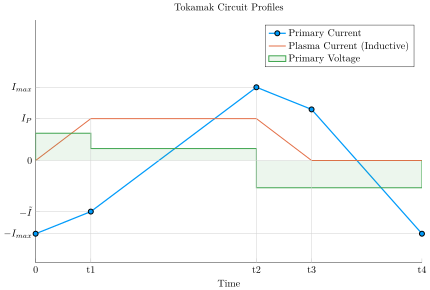

In [123]:
imax = 2.15
itilde = 1.5
ip = 1.23

x = [ 0 1 4 5 7 ]'
yp = [ 0 ip ip 0 0 ]'
yo = [ -imax -itilde imax itilde -imax ]'
t = [ 0 , "t1" ,"t2", "t3", "t4"]

woof = plot(grid=:none,yticks = ([0, -imax, +imax, ip, -itilde],[0, L"{-I_{max}}", L"I_{max}", L"I_P", L"{-\tilde{I}}"]))
plot!(x,yo, label="Primary Current",linewidth=1.25, marker=5)
plot!(x,yp, label="Plasma Current (Inductive)",linewidth=1, xticks = (x,t))

plot!([0,0,1,1,4,4,NaN,4,4,7,7],[0,0.8,0.8,0.35,0.35,0,NaN,0,-0.8,-0.8,0], label="Primary Voltage", fill=true, fillopacity=0.1)

cur_extreme = 4.25

plot!([1,1,NaN,4,4,NaN,5,5,NaN,0,1,NaN,0,4,NaN,0,1,NaN,0,5,NaN,0,7],[-cur_extreme,ip,NaN,-cur_extreme,imax,NaN,-cur_extreme,itilde,NaN,ip,ip,NaN,imax,imax,NaN,-itilde,-itilde,NaN,0,0,NaN,-imax,-imax], label="", linecolor=:lightgrey, linewidth=0.5)
# yticks!([0])

title!("Tokamak Circuit Profiles")
xlabel!("Time")
ylims!(-3,+4.125)
xlims!(0,7)


In [104]:
Plots.save("myfile.tex", woof)

LoadError: [91mUndefVarError: save not defined[39m

In [16]:
Plots

Plots

In [124]:
# using Plots
# pgfplots()

# woof=plot([0,1,2],[0,1,0])
savefig(woof,"bark.tex")

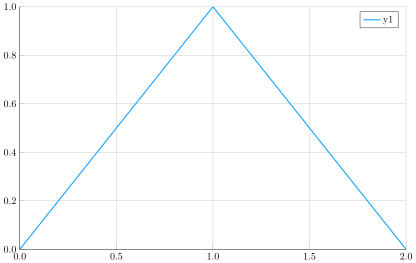

In [20]:
woof=plot([0,1,2],[0,1,0])

In [56]:
using LaTeXStrings

In [57]:
Pkg.add("LaTeXStrings")

INFO: No packages to install, update or remove
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of LaTeXStrings
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [126]:
println((x,t))

([0; 1; 4; 5; 7], Any[0, "t1", "t2", "t3", "t4"])
